# FFN's milestone project 1 : Numbers adding machine using Deep Learning
Part of this code is taken (and modified from the original) from the DUDL course by Mike X Cohen.

course url : udemy.com/course/deeplearning_x/?couponCode=202305

project author : Chen Cohen Gershon

In [ ]:
# import the libraries:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-f29a654030ca>:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Generate the data
we will create 2000 pairs of integers between -10 to 10 and there sum

In [ ]:
# 1. gen data vector of 4096 int's in the range of -10 and 10:
data = np.random.randint(-10,11, (2048, 2))

# 2. calc the target sum of the two integers, this will be the labels
labels = np.sum(data, axis=1, keepdims=True)

# 3. check if size is correct, should be 2000X2
data.shape, labels.shape

((2048, 2), (2048, 1))

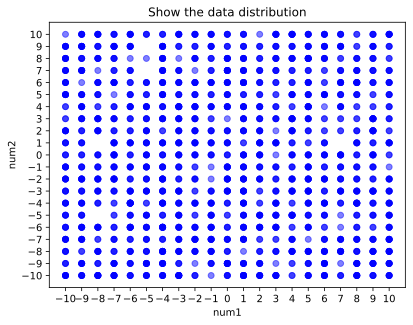

In [ ]:
# visualize the data:
plt.scatter(data.T[0], data.T[1], alpha=0.5, c='blue', marker='o')
plt.xlabel('num1')
plt.ylabel('num2')
plt.title('Show the data distribution')
# Set integer ticks on the x and y axes
plt.xticks(np.arange(min(data.T[0]), max(data.T[0])+1, 1))
plt.yticks(np.arange(min(data.T[0]), max(data.T[0])+1, 1))
plt.show()

In [ ]:
# print the data:
for i in range(data.shape[0]):
  print(data[i], labels[i])

# Now, build the data loaders

In [ ]:
# convert to tensors:
dataT = torch.tensor(data).float()
labelsT = torch.tensor(labels).float()

# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.5)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
dataT.shape, labelsT.shape

(torch.Size([2048, 2]), torch.Size([2048, 1]))

# Build the nodel

In [ ]:
# 1. Model architecutre:
class AdderFFN(nn.Module):
  def __init__(self):
    super().__init__()

    self.inputL = nn.Linear(2, 64)
    self.hiddenL = nn.Linear(64, 1)
    self.outputL = nn.Linear(1, 1)

  def forward(self, x):

    x = F.relu(self.inputL(x))
    x = F.relu(self.hiddenL(x))
    return self.outputL(x)

In [ ]:
def createTheModel():

  # 2. model potimizer and loss func:
  net = AdderFFN()

  lossfunc = nn.MSELoss()

  optimizer = torch.optim.Adam(net.parameters(), lr=.01)

  return net, lossfunc, optimizer

In [ ]:
# check there are no code errors:
net, lossfun, optim = createTheModel()
yHat = net(dataT)
yHat

tensor([[-0.7569],
        [-0.6326],
        [-1.0860],
        ...,
        [-0.7032],
        [-0.8837],
        [-0.7787]], grad_fn=<AddmmBackward0>)

# Training the model:

In [ ]:
from tqdm.notebook import tqdm
def trainTheModle():

  # create the model:
  net, lossfun, optim = createTheModel()

  # define number of epochs:
  numEpochs = 50

  # define losses:
  losses = torch.zeros(numEpochs)

  for epochi in tqdm(range(numEpochs)):

    # loop over training data batches
    batchLoss = []

    # for X,y in train_loader:
    for X, y in train_loader:
      #print(f'X shape: {X.shape} y shape: {y.shape}')

      # forward pass:
      yHat = net(X)

      # compute loss:
      loss = lossfun(yHat, y)
      batchLoss.append(loss.item())

      # backprop:
      optim.zero_grad()
      loss.backward()
      optim.step()

  losses[epochi] = np.mean(batchLoss)

  # do final forward pass
  with torch.no_grad():
    pred = net(dataT)

  trainAcc = 100*torch.mean( (np.abs(pred - labelsT) < 1).float() )


  # test accuracy:
  Xtest, ytest = test_loader.dataset.tensors
  # X = torch.randint(low=-10,high=11,size=(N,2)).float()
  # y = torch.sum(data,axis=1,keepdim=True)
  with torch.no_grad(): # deactivates autograd
    yfinal = net(Xtest)
  # compare the following really long line of code to the training accuracy lines
  testAcc =  100*torch.mean(( ( np.abs(yfinal - ytest) < 1 ).float() ))

  return net, trainAcc, testAcc, losses

  0%|          | 0/50 [00:00<?, ?it/s]

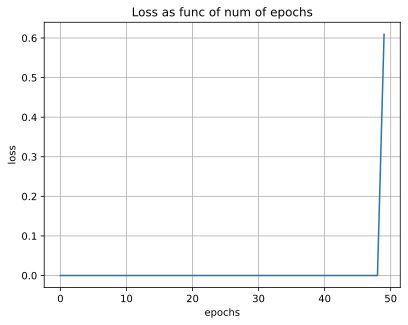

In [ ]:
# test the training func to see there are no code errors:
net, trainAcc, testAcc, losses = trainTheModle()

# plot the loss:
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss as func of num of epochs')
plt.grid()
plt.show()

# Now for the expirament

In [ ]:
for i in range(10):
  net, trainAcc, testAcc, losses = trainTheModle()

  print(f'Final test acc: {testAcc: .2f}% for iteration no {i}')
  print(f'Final test acc: {trainAcc: .2f}% for iteration no {i}')

  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  95.02% for iteration no 0
Final test acc:  95.02% for iteration no 0


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  8.79% for iteration no 1
Final test acc:  9.62% for iteration no 1


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  95.02% for iteration no 2
Final test acc:  95.02% for iteration no 2


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  95.02% for iteration no 3
Final test acc:  95.02% for iteration no 3


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  8.79% for iteration no 4
Final test acc:  9.62% for iteration no 4


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  95.02% for iteration no 5
Final test acc:  95.02% for iteration no 5


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  8.79% for iteration no 6
Final test acc:  9.62% for iteration no 6


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  95.02% for iteration no 7
Final test acc:  95.02% for iteration no 7


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  93.16% for iteration no 8
Final test acc:  93.02% for iteration no 8


  0%|          | 0/50 [00:00<?, ?it/s]

Final test acc:  68.85% for iteration no 9
Final test acc:  69.29% for iteration no 9


In [ ]:
# rand new data:
newData = torch.randint(-10, 11, size=(2000,2)).float()
newLabels = torch.sum(newData, axis=1, keepdim=True)

# run then in the model:
with torch.no_grad():
  preds = net(newData)

print(newData[0], preds[0])

tensor([-10.,  -2.]) tensor([-12.8613])


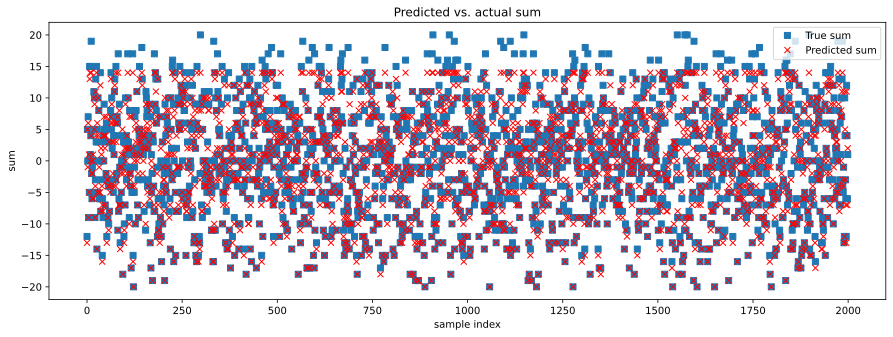

In [ ]:
# plot:
fig = plt.figure(figsize=(15,5))
plt.plot(newLabels, 's')
plt.plot(np.round(preds.detach()), 'rx')
plt.xlabel('sample index')
plt.ylabel('sum')
plt.legend(['True sum','Predicted sum'])
plt.title('Predicted vs. actual sum')
plt.show()